# Binary Classification

### Doing necessary library imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing the dataset

In [2]:
training_data = pd.read_csv('./Data/training_set.csv', index_col=0)
testing_data = pd.read_csv('./Data/test_set.csv', index_col=0)

### Getting a sense of the dataset

#### Looking at the training data top 5 and bottom 5 values to get a sense of them

In [3]:
training_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
training_data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,...,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


#### Getting a sense of the stats and shape of the data by pandas.DataFrame.describe() and panadas.DataFrame.shape

In [5]:
training_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [6]:
(training_data.shape,testing_data.shape)

((3910, 58), (691, 57))

### Checking for missing values

In [7]:
training_data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

### Observations as of this point
1. Training Data appears to be highly skewed
2. Training Data has no missing values
3. Both the training and testing data have 57 'X+\d(1:57)' columns with the addtional target column in training data making the total of 58 for its case.

### Plotting distributions of features

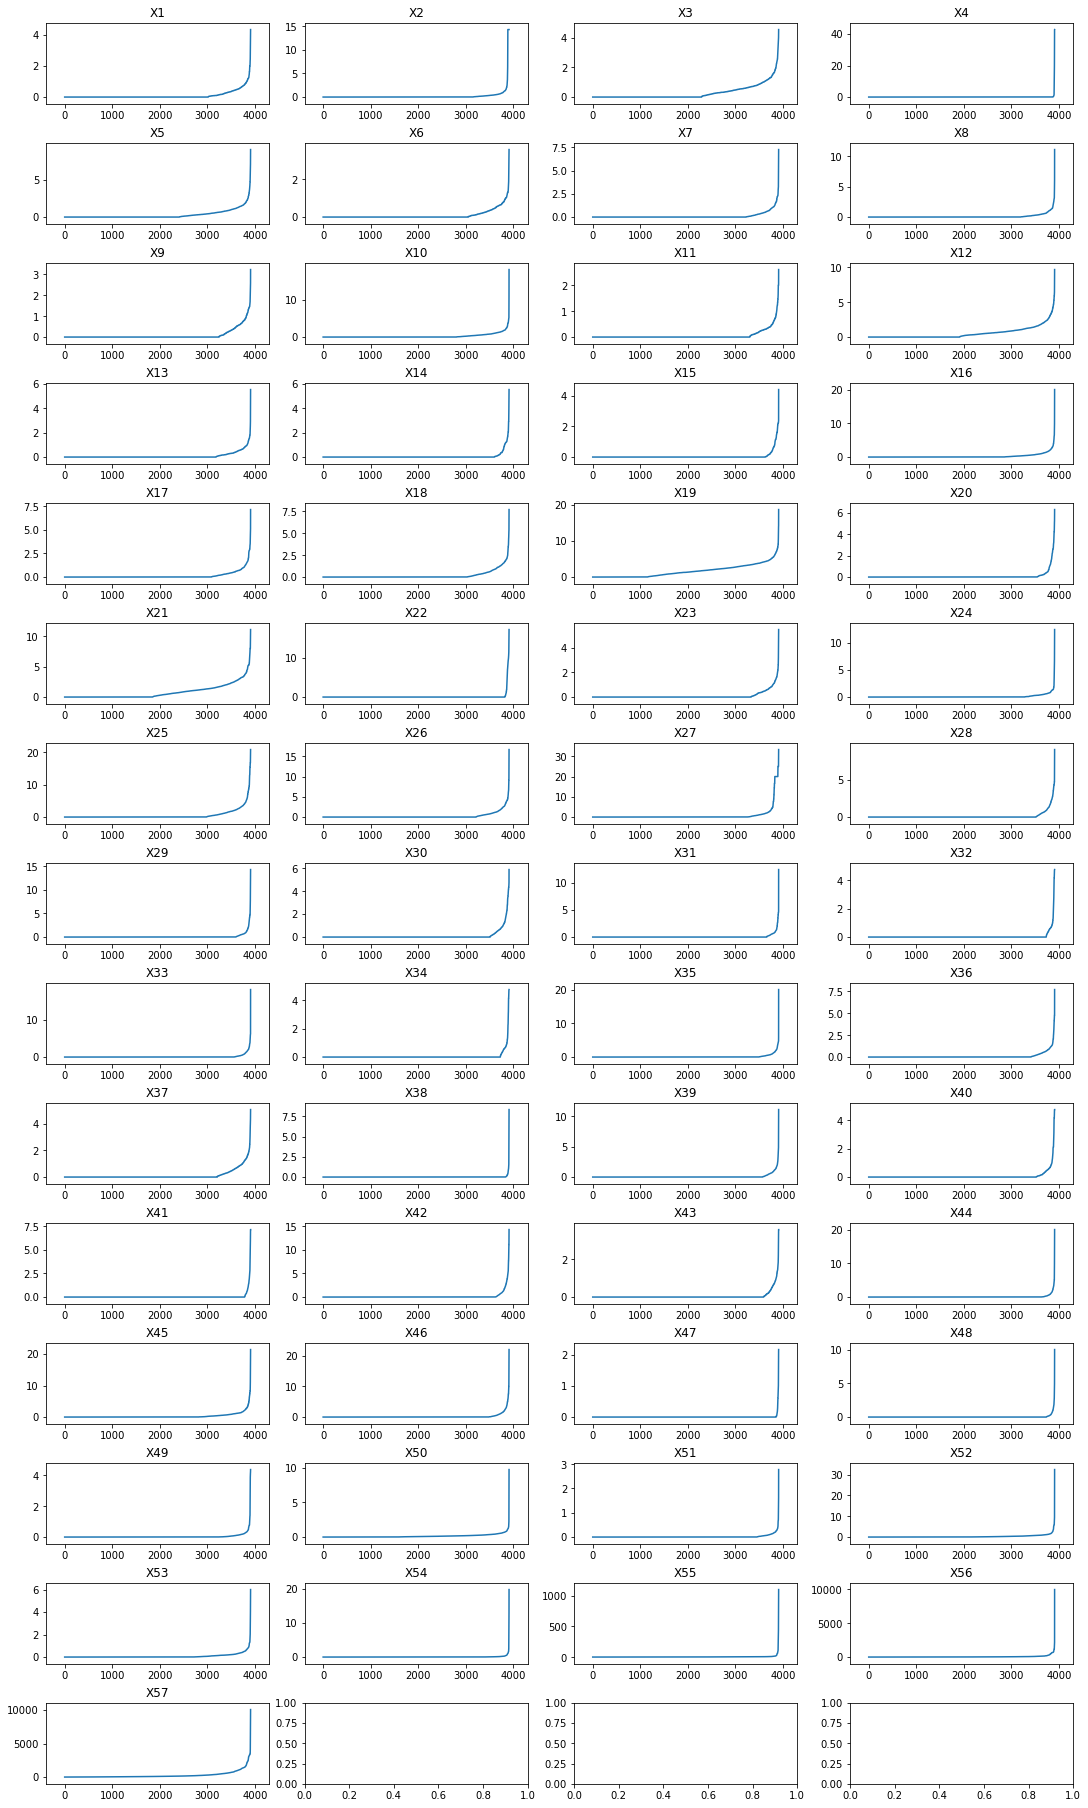

In [8]:
fig,ax = plt.subplots(nrows=15,ncols=4,figsize=(15,25),constrained_layout = True)

j = 0
k = 0

for i in range(1,58):
    if k>3:
        k=0
        j += 1    
    ax[j][k].margins(0.1,0.1);
    ax[j][k].plot(sorted(training_data['X'+str(i)]));
    ax[j][k].set_title('X'+str(i));
    k += 1

### Checking the distribution of Target 'Y' to check for class imbalance

In [9]:
training_data['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

Category 0 => ~60%

Category 1 => ~40%

### Observations as of this point

1. Data is *highly skewed* confirmed by the features' distributions.
2. All features are continuous.
3. No Data imbalance found. 3:2 is a decent class imbalance ratio.

## Splitting the training data

In [10]:
X = training_data.drop(['Y'],axis=1)
y = training_data['Y']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

Train : validation split was definied to be 4:1 => 80% | 0.8 Training data : 20% | 0.2 validation test data

## Feature Selection

Using Random Forest Classifier to get Feature Importance

In [13]:
from sklearn.ensemble import RandomForestClassifier as RF

In [14]:
FS = RF(100, max_depth=None, n_jobs=-1)
FS.fit(X_train,y_train)
feature_importance = FS.feature_importances_

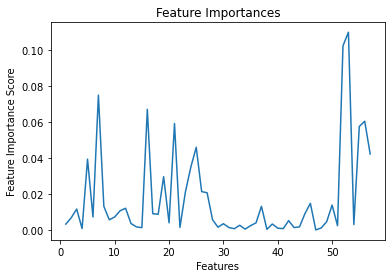

In [15]:
feature_number = [i for i in range(1,58)]
plt.plot(feature_number,feature_importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance Score")
plt.title("Feature Importances")
plt.show()

#### Finding total features having greater feature importance than average

In [16]:
mean_fi = np.mean(feature_importance)
top_fi = len(np.where(feature_importance > mean_fi)[0])
print(f'Total features having feature importance greater than average are {top_fi}')

Total features having feature importance greater than average are 15


#### Plotting Cumulative Distribution of Feature Importances

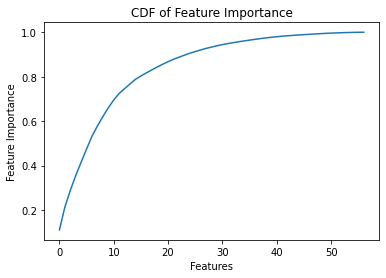

In [17]:
plt.plot(np.cumsum(sorted(feature_importance,reverse=True)))
plt.title('CDF of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance');

From the CDF plot, we tend to infer that 30 features importance add upto very near to one.

#### Ranking the features with their respect to feature importances

In [18]:
fi = sorted(zip(X.columns,feature_importance),key=lambda x: x[1], reverse=True)

#### Extracting Top 30 features

In [19]:
top_features = [x[0] for x in fi[:30]]
fi[:30]

[('X53', 0.10999638924145275),
 ('X52', 0.10243301478398875),
 ('X7', 0.07503699821288962),
 ('X16', 0.06717226746018148),
 ('X56', 0.06054564965284404),
 ('X21', 0.059293374549402915),
 ('X55', 0.05764758317109383),
 ('X25', 0.046060339659231266),
 ('X57', 0.042375210471657175),
 ('X5', 0.03950460206091365),
 ('X24', 0.03500621476967928),
 ('X19', 0.029754049967086086),
 ('X26', 0.02145381906530773),
 ('X23', 0.02113906437476352),
 ('X27', 0.020817553980933465),
 ('X46', 0.014931356720304895),
 ('X50', 0.01396100212272561),
 ('X37', 0.013289714280391947),
 ('X8', 0.013267046625854567),
 ('X12', 0.012202335614855415),
 ('X3', 0.011752653939229533),
 ('X11', 0.010826043532448782),
 ('X45', 0.009222469165582338),
 ('X17', 0.009182511677944446),
 ('X18', 0.008850212882305863),
 ('X6', 0.007378503801136575),
 ('X10', 0.007362792471542512),
 ('X2', 0.006924204091808187),
 ('X28', 0.005853752883648209),
 ('X9', 0.005811198258731475)]

### Selecting the top features from data

In [20]:
X_train_top_FI = X_train[top_features]
X_test_top_FI = X_test[top_features]

In [21]:
(X_train_top_FI.shape, X_test_top_FI.shape)

((3128, 30), (782, 30))

## Scaling The Data - standardization and normalization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_top_FI)

StandardScaler()

In [24]:
X_train_top_FI = pd.DataFrame(scaler.transform(X_train_top_FI),columns=X_train_top_FI.columns)
X_test_top_FI = pd.DataFrame(scaler.transform(X_test_top_FI),columns=X_test_top_FI.columns)

## Model Training

Model Chosen is ***eXtreme Gradient Boosting (XGBoost)*** which is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. No particular reason to choose this other than the fact that the data provided is best suited for Tree based ensemble classifiers.

In [25]:
from xgboost import XGBClassifier as XGB
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,log_loss

/Users/animeshs/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Metrics to considered

* Since binary values are in our class labels, therefore *Binary Cross Entropy* is the way to go here.
* Also, *AUC score* can be used here.
* Since class is almost balanced, therefore no need of metrics like F1 score here.

In [ ]:
classifier = XGB(n_estimators=500,
                    max_depth=5,
                    learning_rate=0.15,
                    colsample_bytree=1,
                    subsample=1,
                    reg_alpha = 0.3,
                    gamma=10,
                    n_jobs=-1,
                    eval_metric='logloss',
                    use_label_encoder=False)

classifier.fit(X_train_top_FI, y_train)

In [ ]:
y_train_pred = classifier.predict(X_train_top_FI)
y_train_prob = classifier.predict_proba(X_train_top_FI)[:,1]
y_test_pred = classifier.predict(X_test_top_FI)
y_test_prob = classifier.predict_proba(X_test_top_FI)[:,1]

##### Binary Cross Entropy (LogLoss) Scores

In [ ]:
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

##### Area Under the Receiver Operating Characteristic Curve (ROC-AUC) Scores

In [ ]:
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

## Predicting on Test Data

Viewing the testing data

In [ ]:
testing_data.head()

### Processing The test data for prediciton as per the same process followed for Training Data

##### Selecting Top Features for the test data

In [ ]:
test_data_top_FI = testing_data[top_features]

##### Using StandardScaler to normalize the test data

In [ ]:
test_data_top_FI = pd.DataFrame(scaler.transform(test_data_top_FI),columns=test_data_top_FI.columns)

In [ ]:
y_test_pred = classifier.predict(test_data_top_FI)

y_test_pred

In [ ]:
y_test_prob = classifier.predict_proba(test_data_top_FI)[:,1]

y_test_prob

## Saving Model for future usage

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier, open('./XGBFTW.sav', 'wb'))

## Exporting y_test predicted scores

In [ ]:
pd.DataFrame(y_test_pred).to_csv('./Testing_predictions.csv')

## Generating requirements.txt 

In [ ]:
!pip freeze > requirements.txt

**Note that all the requirements are not needed, it is as per the anaconda installation on my system, also this is developed on a M1 series Apple Mac which is ARM64 so functioning wont differ much, rather the support architecture clash may occur. For that reason a seperate essential_only_req.txt is present for import specific features**

**Recommended to go for the complete requirements.txt if checking on an Apple M series Mac**